# Variations in the xy-plane

*This notebook explores the variations in the xy-plane.*

Recall the layout of each build as illustrated in the figure below. This notebook is dedicated to investigating the variation between the positions in the xy-plane. To facilitate valid comparisons between these positions, primarily two shape features of the test specimen is utilized, namely planes 2 and 5 from HX2 because these planes are vertical for all orientations in the experiment.


<img src="figs/layout_positions.png" width="600"/>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

import my_functions as func
import my_plot as myplt

In [4]:
"""
Retrieve all the data and sort it into a dictionary where each entry is a separate characteristic.

Key:   Name of the characteristic.
Value: DataFrame containing the measured values and the layout data.

"""

# Initiate a dictionary with characteristics and layout information
char_dict = func.make_char_dict()

---

## Cylindricity

---

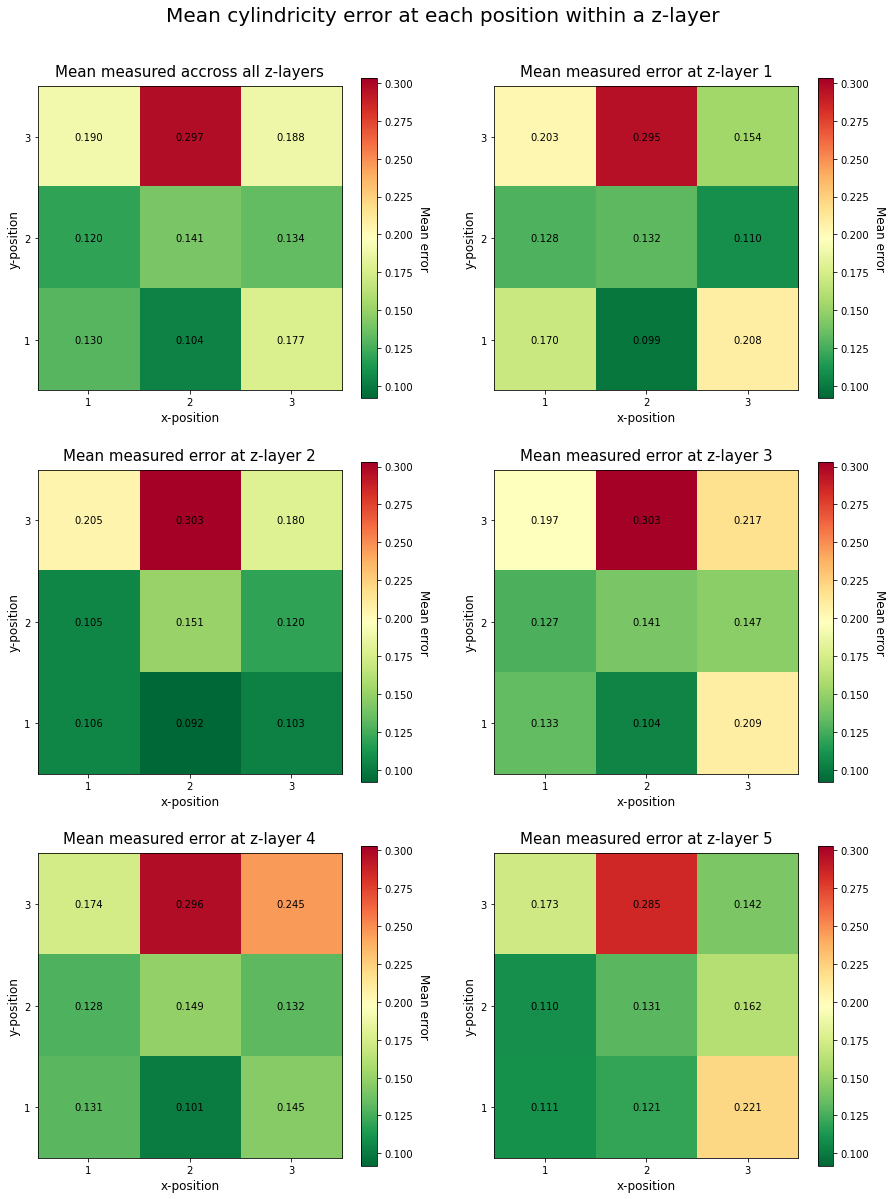

In [5]:
"""
Compare the cylindricity errors of all positions.
This study is incapable of isolating the effect of the position, and is therefore rendered invalid.
However, the study demonstrates that position and/or orientation has an effect on cylindricity.

"""

## Prepare data
# List of characteristics
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Isolate the necessary columns
df = df[['error', 'x_pos', 'y_pos', 'z_pos']]


## Create figure
# Initialize figure as a grid of plots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))

# Set figure title
fig.suptitle('Mean cylindricity error at each position within a z-layer', y=0.93, fontsize=20)

# Set colormap-palette
cmap = "RdYlGn_r"

# Define the maximum and minimum values of the colormap (hard-coded from results)
vmin = 0.092
vmax = 0.303

# Initialzie an empty matrix to represent the error values of a layer
matrix = np.zeros((3, 3))


## Plot the z-layers separately
for z in range(1,6):
    
    # Calculate coordinates for plot
    i = int(z/2)
    j = z%2
    
    # Fill out layer matrix
    for y in range(1,4):
        for x in range(1,4):
            temp = df[(df['z_pos'] == z) & (df['y_pos'] == y) & (df['x_pos'] == x)]
            matrix[y-1, x-1] = temp['error'].mean()
    
    # Flip matrix to fit with the layout decription
    matrix = np.flip(m=matrix, axis=0)
    
    # Create heatmap from matrix
    im = axs[i, j].imshow(matrix, cmap=cmap, vmin=vmin, vmax=vmax)
    
    # Add annotation to the heatmap
    for y in range(1,4):
        for x in range(1,4):
            axs[i, j].text(x-1, y-1, "{:.3f}".format(matrix[y-1, x-1]),
                    ha="center", va="center", color="black")
            
    axs[i, j].set_xticks([0, 1, 2])
    axs[i, j].set_yticks([0, 1, 2])
    
    axs[i, j].set_xticklabels([1, 2, 3])
    axs[i, j].set_yticklabels([3, 2, 1])
    
    axs[i, j].set_title("Mean measured error at z-layer {}".format(z), fontsize=15, pad=10)
    
    axs[i, j].set_xlabel("x-position", fontsize=12)
    axs[i, j].set_ylabel("y-position", fontsize=12)

    cbar = axs[i, j].figure.colorbar(im, ax=axs[i, j])
    cbar.ax.set_ylabel("Mean error", rotation=-90, va="bottom", fontsize=12)

# Prepare data for a 'total'-plot
for y in range(1,4):
    for x in range(1,4):
            temp = df[(df['y_pos'] == y) & (df['x_pos'] == x)]
            matrix[y-1, x-1] = temp['error'].mean()
    
    # Flip matrix to fit with the layout decription
    matrix = np.flip(m=matrix, axis=0)
    
# Plot the 'total' in the first square
axs[0, 0].imshow(matrix, cmap=cmap, vmin=vmin, vmax=vmax)

for y in range(1,4):
    for x in range(1,4):
        axs[0, 0].text(x-1, y-1, "{:.3f}".format(matrix[y-1, x-1]),
                ha="center", va="center", color="black")

        
axs[0, 0].set_xticks([0, 1, 2])
axs[0, 0].set_yticks([0, 1, 2])

axs[0, 0].set_xticklabels([1, 2, 3])
axs[0, 0].set_yticklabels([3, 2, 1])

axs[0, 0].set_title("Mean measured accross all z-layers", fontsize=15, pad=10)

axs[0, 0].set_xlabel("x-position", fontsize=12)
axs[0, 0].set_ylabel("y-position", fontsize=12)

    
cbar = axs[0, 0].figure.colorbar(im, ax=axs[0, 0])
cbar.ax.set_ylabel("Mean error", rotation=-90, va="bottom", fontsize=12)


plt.show()

---

## Flatness

---

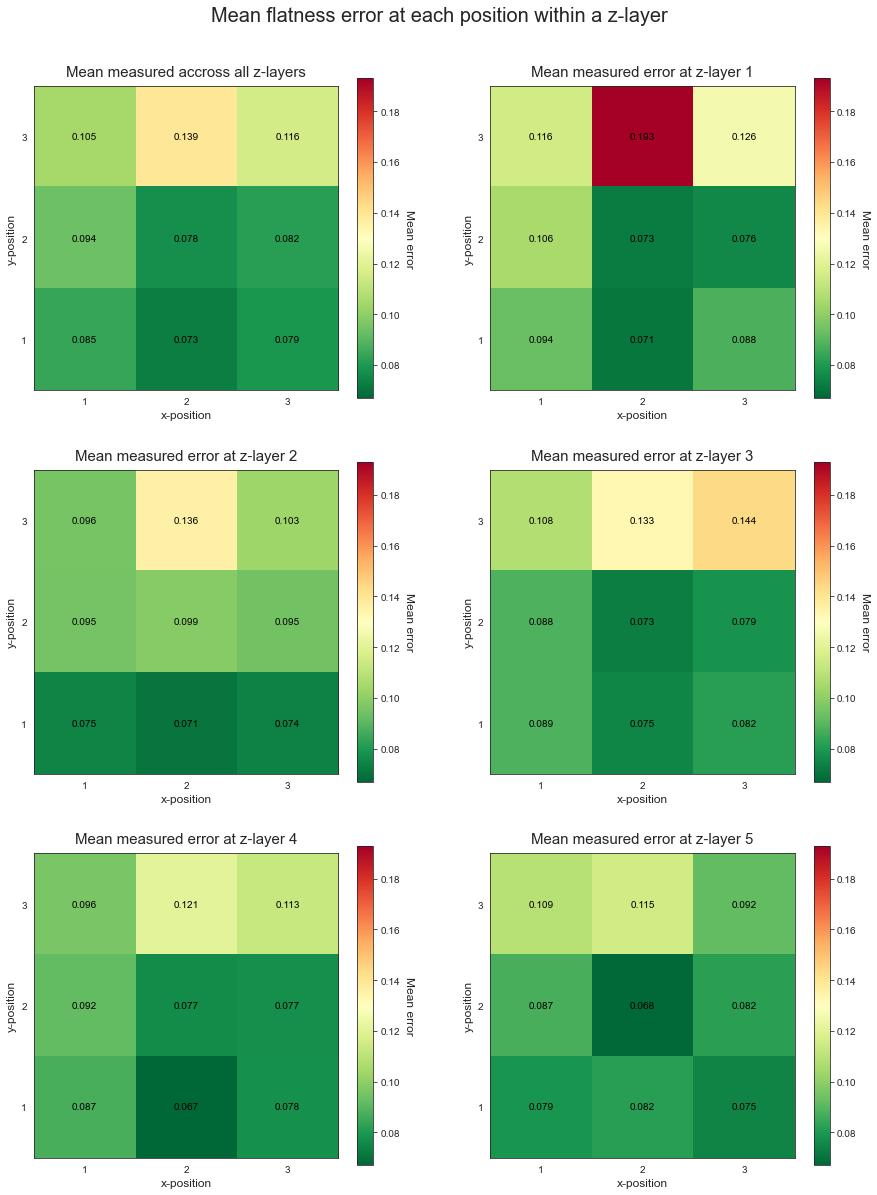

In [6]:
"""
Compare flatness error for positions in the xy-plane accross all z-layers.

Only consider planes 2 and 5 of HX2 because they are vertical for all orientations.

"""

sns.set_style('white')

## Prepare data
# List of characteristics
chars = ['Flatness_HX2_Plane2', 'Flatness_HX2_Plane5']

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Isolate the necessary columns
df = df[['error', 'x_pos', 'y_pos', 'z_pos']]


## Create figure
# Initialize figure as a grid of plots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))

# Set figure title
fig.suptitle('Mean flatness error at each position within a z-layer', y=0.93, fontsize=20)

# Set colormap-palette
cmap = "RdYlGn_r"

# Define the maximum and minimum values of the colormap (hard-coded from results)
vmin = 0.067
vmax = 0.193

# Initialzie an empty matrix to represent the error values of a layer
matrix = np.zeros((3, 3))


## Plot the z-layers separately
for z in range(1,6):
    
    # Calculate coordinates for plot
    i = int(z/2)
    j = z%2
    
    # Fill out layer matrix
    for y in range(1,4):
        for x in range(1,4):
            temp = df[(df['z_pos'] == z) & (df['y_pos'] == y) & (df['x_pos'] == x)]
            matrix[y-1, x-1] = temp['error'].mean()
    
    # Flip matrix to fit with the layout decription
    matrix = np.flip(m=matrix, axis=0)
    
    # Create heatmap from matrix
    im = axs[i, j].imshow(matrix, cmap=cmap, vmin=vmin, vmax=vmax)
    
    # Add annotation to the heatmap
    for y in range(1,4):
        for x in range(1,4):
            axs[i, j].text(x-1, y-1, "{:.3f}".format(matrix[y-1, x-1]),
                    ha="center", va="center", color="black")
            
    axs[i, j].set_xticks([0, 1, 2])
    axs[i, j].set_yticks([0, 1, 2])
    
    axs[i, j].set_xticklabels([1, 2, 3])
    axs[i, j].set_yticklabels([3, 2, 1])
    
    axs[i, j].set_title("Mean measured error at z-layer {}".format(z), fontsize=15, pad=10)
    
    axs[i, j].set_xlabel("x-position", fontsize=12)
    axs[i, j].set_ylabel("y-position", fontsize=12)
    
    cbar = axs[i, j].figure.colorbar(im, ax=axs[i, j])
    cbar.ax.set_ylabel("Mean error", rotation=-90, va="bottom", fontsize=12)

# Prepare data for a 'total'-plot
for y in range(1,4):
    for x in range(1,4):
            temp = df[(df['y_pos'] == y) & (df['x_pos'] == x)]
            matrix[y-1, x-1] = temp['error'].mean()
    
    # Flip matrix to fit with the layout decription
    matrix = np.flip(m=matrix, axis=0)
    
# Plot the 'total' in the first square
axs[0, 0].imshow(matrix, cmap=cmap, vmin=vmin, vmax=vmax)

for y in range(1,4):
    for x in range(1,4):
        axs[0, 0].text(x-1, y-1, "{:.3f}".format(matrix[y-1, x-1]),
                ha="center", va="center", color="black")

        
axs[0, 0].set_xticks([0, 1, 2])
axs[0, 0].set_yticks([0, 1, 2])

axs[0, 0].set_xticklabels([1, 2, 3])
axs[0, 0].set_yticklabels([3, 2, 1])

axs[0, 0].set_title("Mean measured accross all z-layers", fontsize=15, pad=10)

axs[0, 0].set_xlabel("x-position", fontsize=12)
axs[0, 0].set_ylabel("y-position", fontsize=12)

    
cbar = axs[0, 0].figure.colorbar(im, ax=axs[0, 0])
cbar.ax.set_ylabel("Mean error", rotation=-90, va="bottom", fontsize=12)


plt.show()

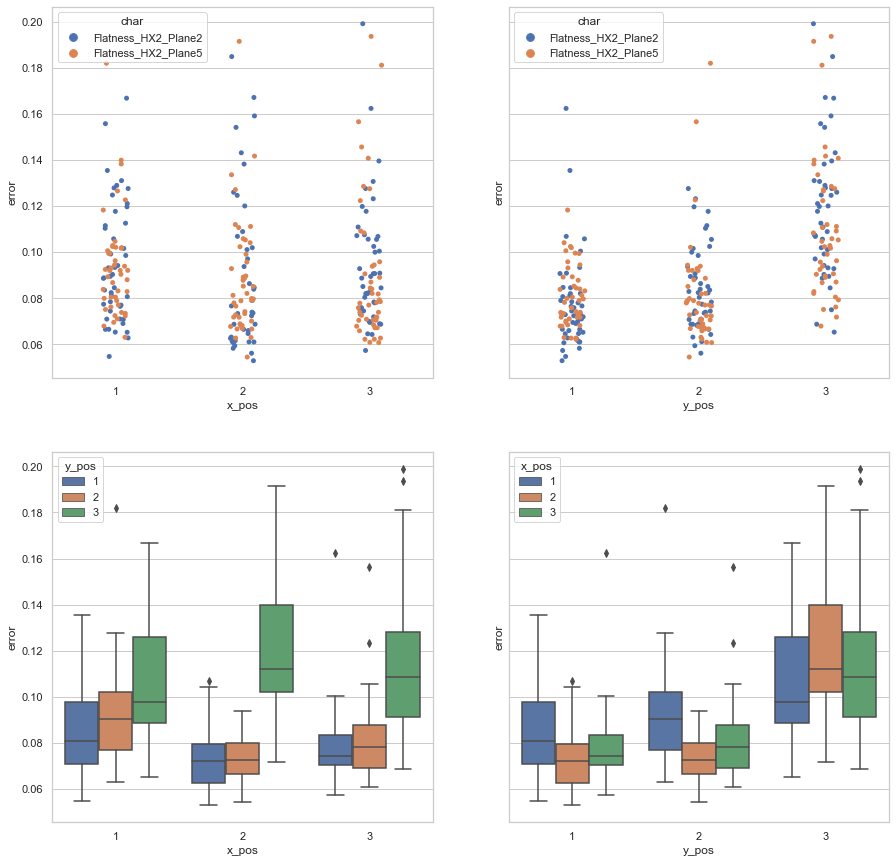

Low limit: -0.013901207684529723
High limit: 0.20299685670323153


,error,build,char,part_index,x_pos,y_pos,z_pos,angle,center_x,center_y,center_z
part_name,,,,,,,,,,,
Leirmo_Exp1_Build1_#14,0.207032,1,Flatness_HX2_Plane2,14,2,2,2,75,170,170,150.60
Leirmo_Exp1_Build1_#17,0.222995,1,Flatness_HX2_Plane2,17,2,3,2,-90,170,270,150.60
Leirmo_Exp1_Build1_#8,0.237748,1,Flatness_HX2_Plane2,8,2,3,1,-90,170,270,50.88
Leirmo_Exp1_Build1_#8,0.400476,1,Flatness_HX2_Plane5,8,2,3,1,-90,170,270,50.88


In [7]:
"""
Compare flatness and variation of vertical planes at different positions in the xy-plane

"""

## Prepare data
# List of characteristics
chars = ['Flatness_HX2_Plane2', 'Flatness_HX2_Plane5']

# Initiate list of dataframes
dfs = []

# Retrieve the characteristics from the dictionary
for char, i in zip(chars, range(len(chars))):
    dfs.append(char_dict[char])
    
    # Add column of characteristic name (if not allready there)
    if 'char' not in dfs[i].columns:
        dfs[i].insert(loc=2, column='char', value=char)

# Concatinate dataframes
df = pd.concat(dfs)


## Filter data
# Calculate standard deviation
std = df['error'].std()

# Define upper and lower limits (mean +/- 3 standard deviations)
hi_lim = df['error'].mean() + (3*std)
lo_lim = df['error'].mean() - (3*std)

# Filter dataframe to only include values between the limits
df_filtered = df[(df['error'] < hi_lim) & (df['error'] > lo_lim)]
df_removed = df[(df['error'] > hi_lim) | (df['error'] < lo_lim)]


## Create figure
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15), sharey=True)

sns.stripplot(ax=axes[0, 0], data=df_filtered, x='x_pos', y='error', hue='char')
sns.stripplot(ax=axes[0, 1], data=df_filtered, x='y_pos', y='error', hue='char')

sns.boxplot(ax=axes[1, 0], x='x_pos', y='error', hue='y_pos', data=df_filtered)
sns.boxplot(ax=axes[1, 1], x='y_pos', y='error', hue='x_pos', data=df_filtered)

plt.show()

print("Low limit: {}\nHigh limit: {}".format(lo_lim, hi_lim))



df_removed.head()

T-statistic:	0.7345010519519519
P-value:	0.46328558432491274

 [[[-0.15025224 -0.04713156  0.3481818 ]
  [-0.18586831 -0.15061008  0.21938627]
  [ 0.14672056 -0.18764236 -0.08398927]]

 [[-0.20851325 -0.1247502   0.10285309]
  [-0.01549436  0.43146806 -0.11279549]
  [ 0.1347174   0.30640028  0.09335166]]

 [[ 0.20222329 -0.18712588  0.08431377]
  [ 0.12386411 -0.13072055  0.08877718]
  [ 0.15009211  0.02599637  0.06401767]]

 [[-0.17896335 -0.13266096 -0.0147918 ]
  [ 0.14293692 -0.0689152   0.19362504]
  [ 0.15653529  0.21242713 -0.37585253]]

 [[-0.3048474  -0.04261191 -0.1204701 ]
  [ 0.025289    0.13470851  0.38213452]
  [ 0.13064724  0.2474318   0.06294579]]]

Max value:	43.15 %
Min value:	-37.59 %


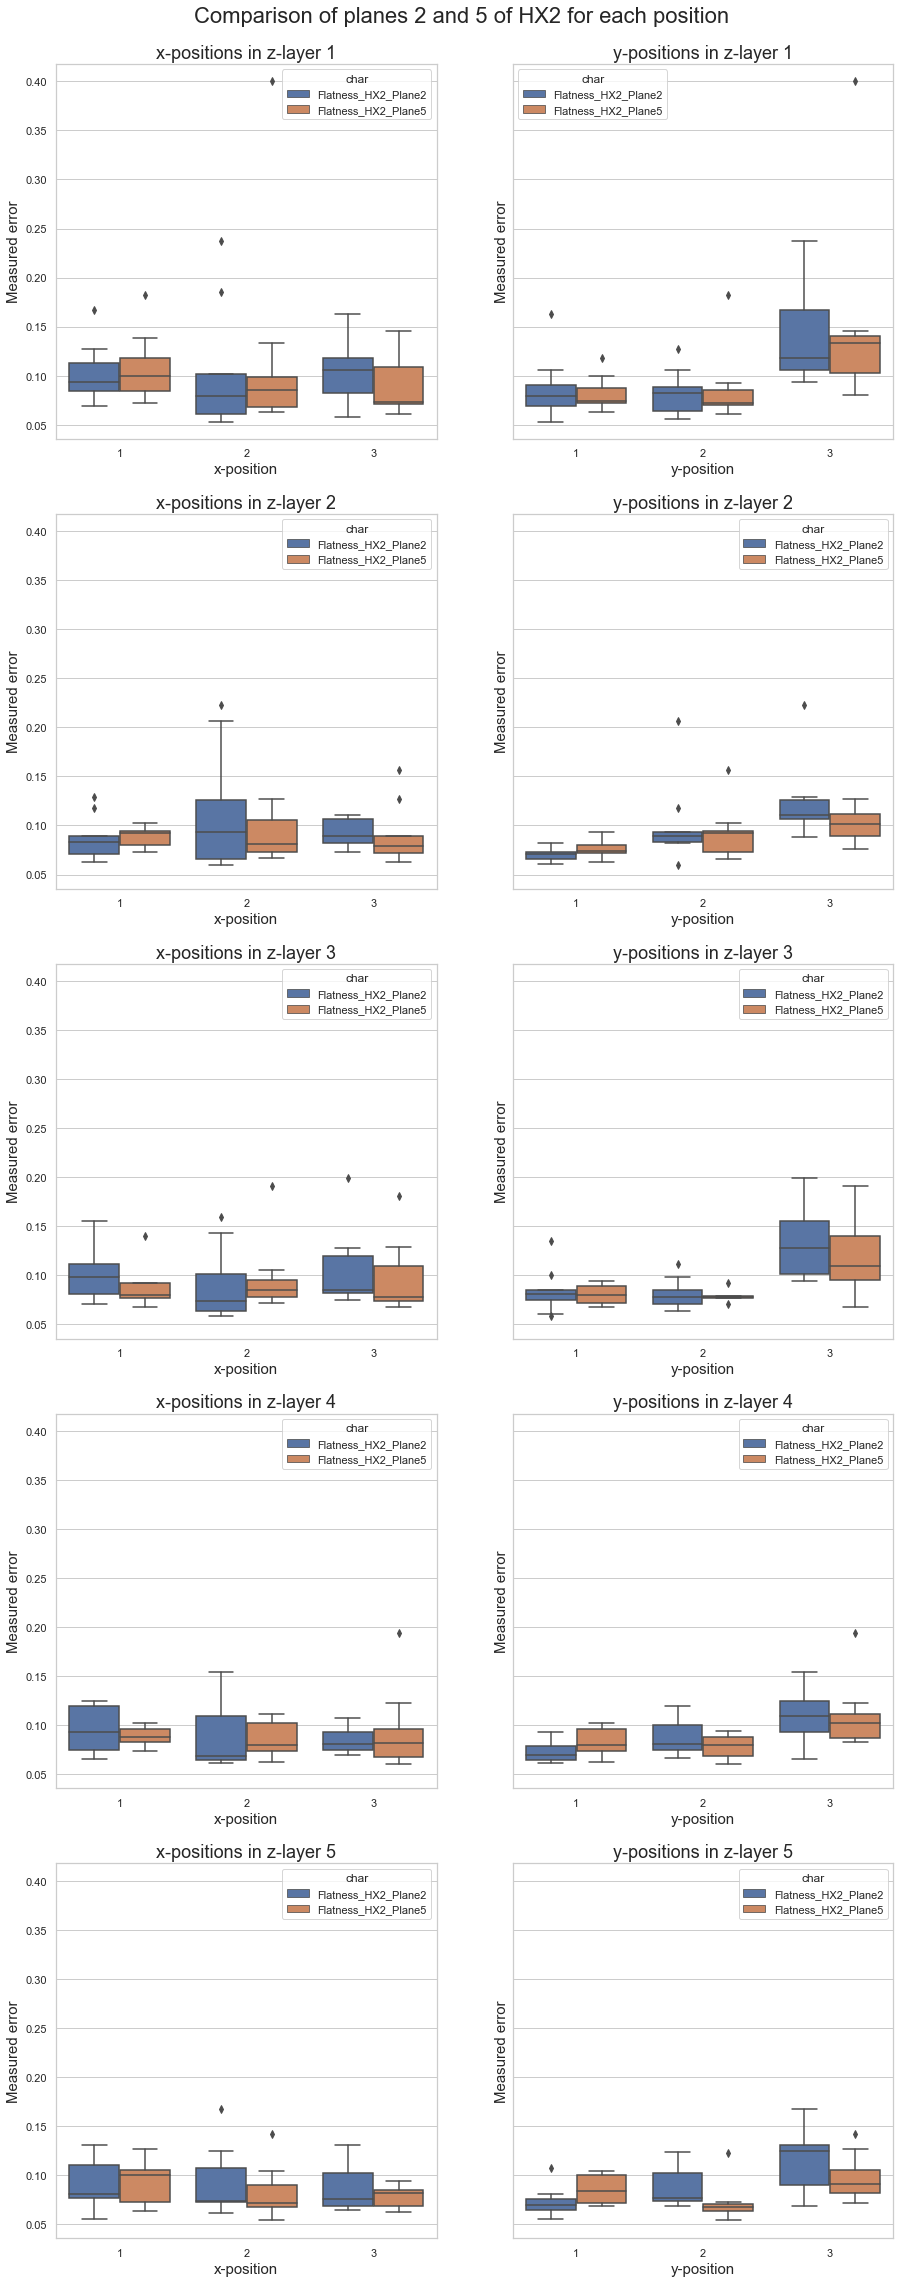

In [17]:
"""
Further investigate the difference between the two planes 2 and 5 from HX2

"""

## Prepare data
# List of characteristics
chars = ['Flatness_HX2_Plane2', 'Flatness_HX2_Plane5']

# Initiate list of dataframes
dfs = []

# Retrieve the characteristics from the dictionary
for char, i in zip(chars, range(len(chars))):
    dfs.append(char_dict[char])
    
    # Add column of characteristic name (if not allready there)
    if 'char' not in dfs[i].columns:
        dfs[i].insert(loc=2, column='char', value=char)

# Concatinate dataframes
df = pd.concat(dfs)


## Filter data
# Calculate standard deviation
std = df['error'].std()

# Define upper and lower limits (mean +/- 3 standard deviations)
hi_lim = df['error'].mean() + (3*std)
lo_lim = df['error'].mean() - (3*std)

# Filter dataframe to only include values between the limits
df_filtered = df[(df['error'] < hi_lim) & (df['error'] > lo_lim)]
df_removed = df[(df['error'] > hi_lim) | (df['error'] < lo_lim)]


# Perform T-test to compare the distributions
df_t = func.get_p_vals(df_filtered, 'char')

t_stat, p_val = ttest_ind(dfs[0]['error'], dfs[1]['error'])

print("T-statistic:\t{}\nP-value:\t{}".format(t_stat, p_val))

matrix = np.zeros((5, 3, 3))

for z in [1, 2, 3, 4, 5]:
    for y in [1, 2, 3]:
        for x in [1, 2, 3]:
            df_n = df[(df['z_pos'] == z) & (df['y_pos'] == y) & (df['x_pos'] == x)]
            
            df_p1 = df_n[df_n['char'] == 'Flatness_HX2_Plane2']
            df_p2 = df_n[df_n['char'] == 'Flatness_HX2_Plane5']
            
            p1 = df_p1['error'].mean()
            p2 = df_p2['error'].mean()
            
            diff = p1-p2
            
            rel_diff = diff / ((p1+p2)/2)
            
            matrix[z-1, y-1, x-1] = rel_diff
            
print("\n", matrix)

print("\nMax value:\t{:.2f} %\nMin value:\t{:.2f} %".format(matrix.max() * 100, matrix.min() * 100))

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15,40), sharey=True)

fig.suptitle('Comparison of planes 2 and 5 of HX2 for each position', y=0.9, fontsize=22)

# Go through all z-layers
for i in range(5):
    # Isolate data for the relevant z-layer
    temp = df[df['z_pos'] == i+1]
    
    # Iterate between x- and y-positions
    for j in range(2):
        # Create boxplot
        b = sns.boxplot(ax=axs[i, j], x='{}_pos'.format('y' if j else 'x'), y='error', hue='char', data=temp)
        b.axes.set_title("{}-positions in z-layer {}".format('y' if j else 'x', i+1), fontsize=18)
        b.set_xlabel("{}-position".format('y' if j else 'x'), fontsize=15)
        b.set_ylabel("Measured error", fontsize=15)

# Display the figure
plt.show()

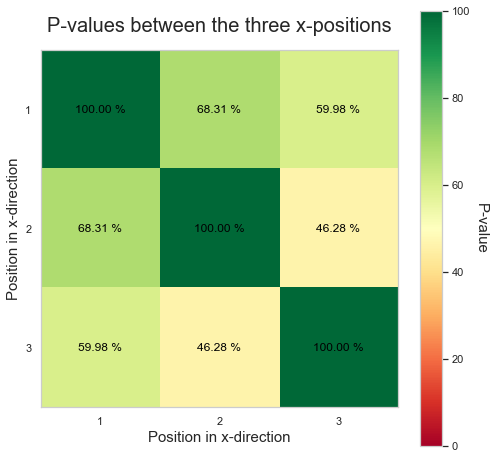

In [9]:
"""
Conduct T-test between all combinations of x-positions.

Only consider planes 2 and 5 of HX2 because they are vertical for all orientations.

"""

## Retrieve and format data
# List of characteristics
chars = ['Flatness_HX2_Plane2', 'Flatness_HX2_Plane5']

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Extract columns of interest
df = df[['error', 'x_pos']]

# Conuct T-test and store P-values
df_p_vals = func.get_p_vals(df, 'x_pos')

# Create figure
fig, ax = plt.subplots(figsize=(8, 8))
ax = myplt.p_val_heat_map(ax, df_p_vals)

# Label the axes
ax.set_xlabel('Position in x-direction', fontsize=15)
ax.set_ylabel('Position in x-direction', fontsize=15)

# Give title for plot
ax.set_title('P-values between the three x-positions', fontsize=20, pad=18)

# Show plot
plt.show()

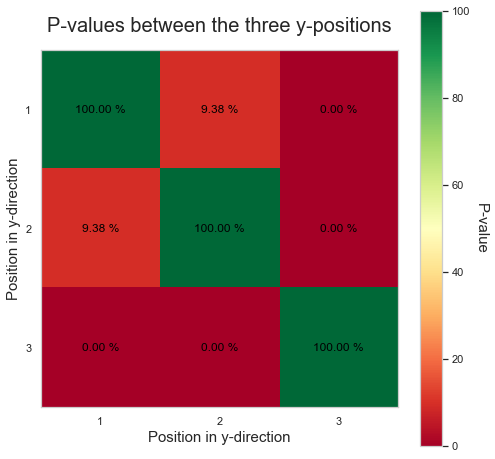

In [10]:
"""
Conduct T-test between all combinations of y-positions.

Only consider planes 2 and 5 of HX2 because they are vertical for all orientations.

"""

## Retrieve and format data
# List of characteristics
chars = ['Flatness_HX2_Plane2', 'Flatness_HX2_Plane5']

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Extract columns of interest
df = df[['error', 'y_pos']]

# Conuct T-test and store P-values
df_p_vals = func.get_p_vals(df, 'y_pos')

# Create figure
fig, ax = plt.subplots(figsize=(8, 8))

# Get heatmap
ax = myplt.p_val_heat_map(ax, df_p_vals)

# Label the axes
ax.set_xlabel('Position in y-direction', fontsize=15)
ax.set_ylabel('Position in y-direction', fontsize=15)

# Give title for plot
ax.set_title('P-values between the three y-positions', fontsize=20, pad=18)

# Show plot
plt.show()